In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_desc = joblib.load("../joblib_files/X_desc.joblib")
y = joblib.load("../joblib_files/y.joblib")

## Yield label distribution

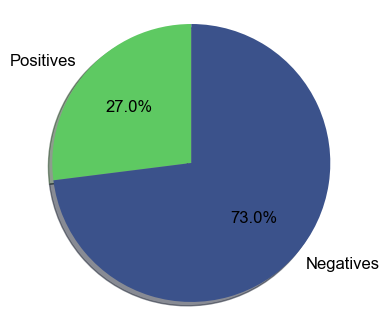

In [3]:
labels = 'Positives', 'Negatives'
sizes = [len(np.where(y==1)[0]), len(np.where(y==0)[0])]

fig, ax = plt.subplots(figsize=(4,4))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, textprops={"fontfamily":"arial", "fontsize":12},
       colors=["#5ec962", "#3b528b"])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.savefig(f"../FigureS7B.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show()

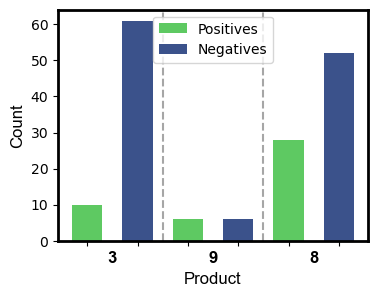

In [4]:
y_ProBn = y[:71]
y_ProIn = y[71:83]
y_AlaIn = y[83:]

x = np.arange(6)
heights = [
    len(np.where(y_ProBn == 1)[0]),
    len(np.where(y_ProBn == 0)[0]),
    len(np.where(y_ProIn == 1)[0]),
    len(np.where(y_ProIn == 0)[0]),
    len(np.where(y_AlaIn == 1)[0]),
    len(np.where(y_AlaIn == 0)[0]),
]
c = ["#5ec962", "#3b528b"] *3

fig, ax = plt.subplots(figsize=(4,3))
plot = ax.bar(x, heights, color=c, width=0.6)
ax.legend(
    [plot[0], plot[1]], 
    ["Positives", "Negatives"],
    loc="upper center",
    # bbox_to_anchor = (1.01, 0.98)
)
ax.set_ylabel("Count", fontsize=12, fontfamily="arial")
ax.set_xticklabels([])
ax.annotate('3', xy=(0.5, -6), xycoords='data', annotation_clip=False, ha="center", fontweight="bold", fontfamily="arial", fontsize=12)
ax.annotate('9', xy=(2.5, -6), xycoords='data', annotation_clip=False, ha="center", fontweight="bold", fontfamily="arial", fontsize=12)
ax.annotate('8', xy=(4.5, -6), xycoords='data', annotation_clip=False, ha="center", fontweight="bold", fontfamily="arial", fontsize=12)
ax.annotate("Product", xy=(2.5, -12), xycoords='data', annotation_clip=False, ha="center", fontsize=12, fontfamily="arial")

for i in range(2):
    ax.axvline(2*i+1.5, 0, 1, c="grey", ls="--", alpha=0.7)
for axis in ['top', 'bottom', 'left', 'right']:
	ax.spines[axis].set_linewidth(2)

fig.savefig(f"../FigureS7C.svg", format="svg", dpi=300, bbox_inches="tight")

## Impact of individual ligand on binary yield

In [5]:
X_id = joblib.load("../joblib_files/X_id.joblib")
print(X_id.shape)
print(np.unique(X_id[:,3]))

(163, 8)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 24 25 26]


In [6]:
pos_portion = []
num_used = []
for ligand_id in np.unique(X_id[:,3]) :
    inds = np.where(X_id[:, 3] == ligand_id)[0]
    pos_portion.append(
        np.sum(y[inds]) / len(inds)
    )
    num_used.append(len(inds))

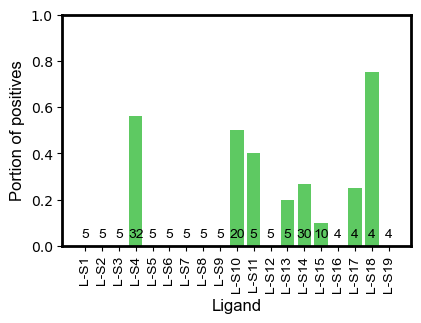

In [7]:
ligand_ids = np.unique(X_id[:,3])
ligand_names = pd.read_excel("descriptors.xlsx", sheet_name="Ligands", usecols=[1])

fig, ax = plt.subplots(figsize=(4.5,3))
ax.bar(np.arange(len(ligand_ids)), pos_portion, color=c[0])
ax.set_xticks(np.arange(len(ligand_ids)))
ax.set_xticklabels(
    [f"L-S{x+1}" for x in range(len(ligand_ids))],
    rotation=90, fontfamily="arial"
)
ax.set_xlabel("Ligand", fontsize=12, fontfamily="arial")
ax.set_yticks([round(0.2*x, 1) for x in range(6)])
ax.set_yticklabels([round(0.2*x, 1) for x in range(6)])
ax.set_ylabel("Portion of positives", fontsize=12, fontfamily="arial")
for i in range(len(ligand_ids)):
    ax.annotate(
        text=num_used[i], xy=(i, 0.05), xycoords="data", ha="center", va="center", fontfamily="arial"
    )
for axis in ['top', 'bottom', 'left', 'right']:
	ax.spines[axis].set_linewidth(2)

fig.savefig(f"../FigureS7D.svg", format="svg", dpi=300, bbox_inches="tight")

## Correlation between descriptors within a reaction component

In [8]:
sheets = ["Ligands", "Solvents"]

In [14]:
def plot_corr_heatmap(desc_array, desc_names, filename):
    corr = np.corrcoef(desc_array.T)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(len(desc_names)*0.75, len(desc_names)*0.75))
        ax = sns.heatmap(corr, mask=mask, square=True, vmax=1, vmin=-1, annot=True, cbar=False)
        ax.set_xticklabels(desc_names, rotation=90)
        ax.set_yticklabels(desc_names, rotation=0)

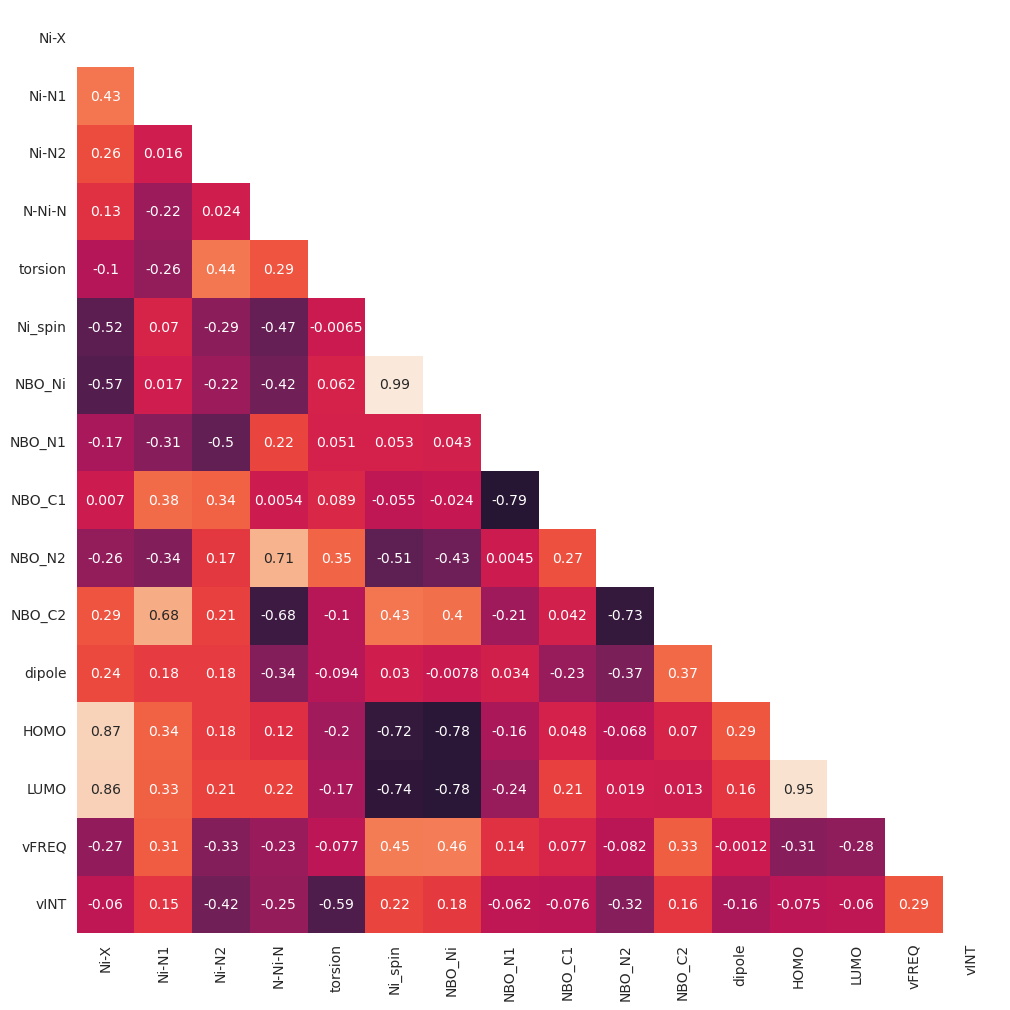

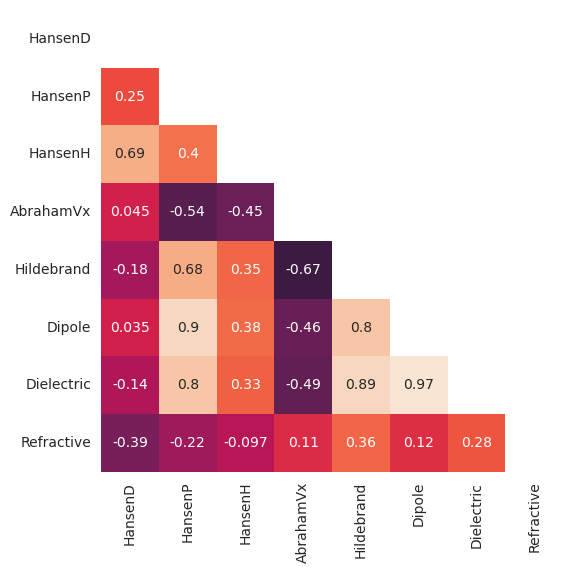

In [10]:
for sheet in sheets : 
    df = pd.read_excel("descriptors.xlsx", sheet_name=sheet)
    if sheet == "Ligands" : start_col = 3
    else : start_col = 2
    desc_array = df.iloc[:, start_col:]
    plot_corr_heatmap(desc_array, df.columns[start_col:])

#### After removing highly correlated ones

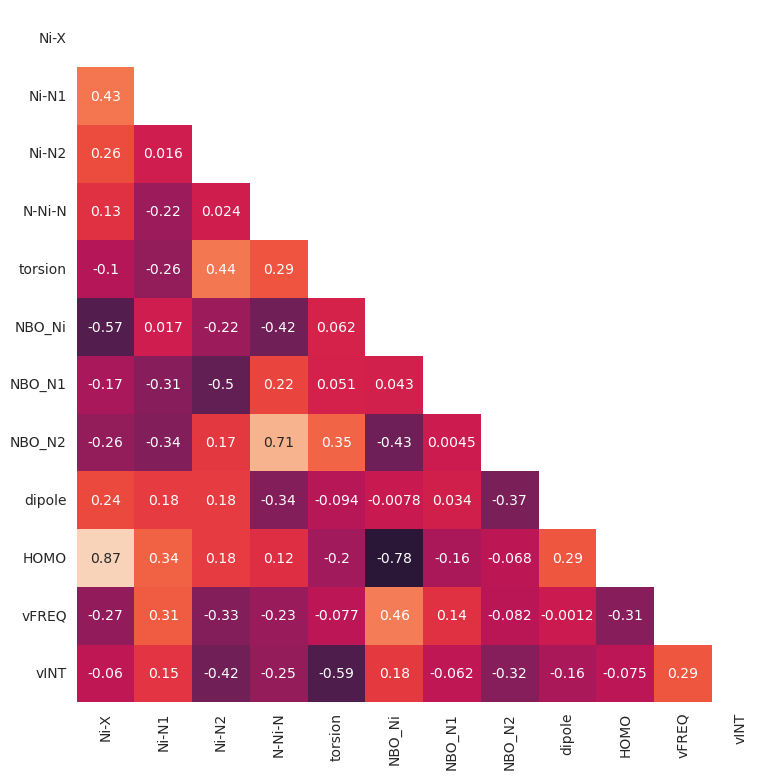

In [11]:
df = pd.read_excel("descriptors.xlsx", sheet_name="Ligands", usecols=[3,4,5,6,7,9,10,12,14,15,17,18])
desc_array = df.to_numpy()
plot_corr_heatmap(desc_array, df.columns)

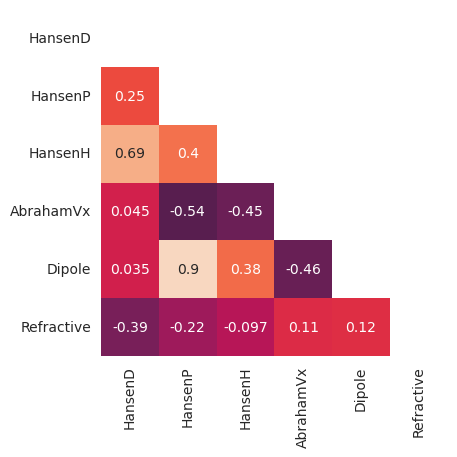

In [12]:
df = pd.read_excel("descriptors.xlsx", sheet_name="Solvents", usecols=[2,3,4,5,7,9])
desc_array = df.to_numpy()
plot_corr_heatmap(desc_array, df.columns)